In [1]:
!pip install wordcloud
!pip install matplotlib
!pip install pillow
!pip install numpy

In [2]:
import numpy as np

import os
import re
from PIL import Image
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import io

In [3]:
mask = np.array(Image.open('C:/example/Color.png'))

In [20]:
f = open('C:/example/kobartkkmamorph.txt','r',encoding = 'cp949')
txt = f.readlines()
f.close()

In [21]:
new_txt=[]
for i in txt:
    new_txt.append(i.replace('\n',''))

In [22]:
new_txt

['최근',
 '듣',
 '어',
 '도시',
 '의',
 '경쟁력',
 '향상',
 '을',
 '위하',
 'ㄴ',
 '새',
 '롭',
 'ㄴ',
 '전략',
 '의',
 '하나',
 '로',
 '창조',
 '도시',
 '에',
 '대하',
 'ㄴ',
 '논의',
 '가',
 '활발',
 '하',
 '게',
 '진행',
 '되',
 '고',
 '있',
 '다',
 '.',
 '창조',
 '도시',
 '는',
 '창조적',
 '인재',
 '들',
 '이',
 '창의성',
 '을',
 '발휘',
 '하',
 'ㄹ',
 '수',
 '있',
 '는',
 '환경',
 '을',
 '갖추',
 'ㄴ',
 '도시',
 '이',
 '다',
 '.',
 '즉',
 '창조',
 '도시',
 '는',
 '인재',
 '들',
 '을',
 '위하',
 'ㄴ',
 '문화',
 '및',
 '거주',
 '환경',
 '의',
 '창',
 '조성',
 '이',
 '풍부',
 '하',
 '며',
 ',',
 '혁신적',
 '이',
 '고',
 '도',
 '유연',
 '하',
 'ㄴ',
 '경제',
 '시스템',
 '을',
 '구비',
 '하',
 '고',
 '있',
 '는',
 '도시',
 '이',
 'ㄴ',
 '것',
 '이',
 '다',
 '.',
 '창조',
 '도시',
 '의',
 '주되',
 'ㄴ',
 '동력',
 '을',
 '창조',
 '산업',
 '으로',
 '보',
 'ㄹ',
 '것',
 '이',
 'ㄴ가',
 '창조',
 '계층',
 '으로',
 '보',
 'ㄹ',
 '것',
 '인가',
 '에',
 '대하',
 '어서',
 '는',
 '견해',
 '가',
 '다소',
 '엇갈리',
 '고',
 '있',
 '다',
 '.',
 '창조',
 '산업',
 '을',
 '중시',
 '하',
 '는',
 '관점',
 '에서',
 '는',
 ',',
 '창조',
 '산업',
 '이',
 '도시',
 '에',
 '인적',
 ',',
 '사회적',
 ',',
 '문화적',
 ',',
 '경

In [23]:
str_txt=''
for i in new_txt:
    str_txt = str_txt + i + ' '

In [24]:
from collections import Counter
Counter(new_txt).most_common()

[('창조', 26),
 (',', 26),
 ('이', 25),
 ('하', 24),
 ('는', 23),
 ('을', 20),
 ('도시', 19),
 ('의', 19),
 ('ㄴ', 16),
 ('.', 16),
 ('다', 10),
 ('고', 9),
 ('있', 8),
 ('계층', 8),
 ('에', 7),
 ('되', 7),
 ('를', 7),
 ('가', 6),
 ('ㄹ', 6),
 ('산업', 6),
 ('으로', 6),
 ('ㄴ다', 6),
 ('기', 6),
 ('들', 5),
 ('환경', 5),
 ('보', 5),
 ('위하', 4),
 ('로', 4),
 ('대하', 4),
 ('것', 4),
 ('어서', 4),
 ('과', 4),
 ('은', 4),
 ('어', 3),
 ('인재', 3),
 ('수', 3),
 ('창', 3),
 ('조성', 3),
 ('에서', 3),
 ('가치', 3),
 ('와', 3),
 ('등', 3),
 ('지', 3),
 ('경쟁력', 2),
 ('논의', 2),
 ('게', 2),
 ('문화', 2),
 ('도', 2),
 ('동력', 2),
 ('중시', 2),
 ('관점', 2),
 ('경제적', 2),
 ('부가', 2),
 ('고용', 2),
 ('창출', 2),
 ('ㄴ다고', 2),
 ('재능', 2),
 ('개인', 2),
 ('창의력', 2),
 ('네트워크', 2),
 ('따르', 2),
 ('아서', 2),
 ('무엇', 2),
 ('필요', 2),
 ('성', 2),
 ('그것', 2),
 ('만들', 2),
 ('않', 2),
 ('어렵', 2),
 ('최근', 1),
 ('듣', 1),
 ('향상', 1),
 ('새', 1),
 ('롭', 1),
 ('전략', 1),
 ('하나', 1),
 ('활발', 1),
 ('진행', 1),
 ('창조적', 1),
 ('창의성', 1),
 ('발휘', 1),
 ('갖추', 1),
 ('즉', 1),
 ('및', 1),
 ('거주', 1),

In [29]:
stop = [',','을','의','.','이','적','','는','에','으로','들','를','과','위','가','있는','것','하는','이다','와','등','은','할','하고',
       '인','인가','에서는','따라서','무엇','로','해서는','그것','되고','즉','및','고도','대해','서는','다소','음로써','한다고',
       '다','예','로는','여서','이를','통해','에는','과의','에서','또한','그','된','하여','인지','하','ㄴ','고']
stopwords = set(stop)

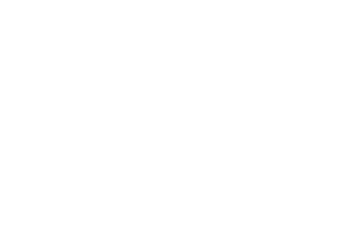

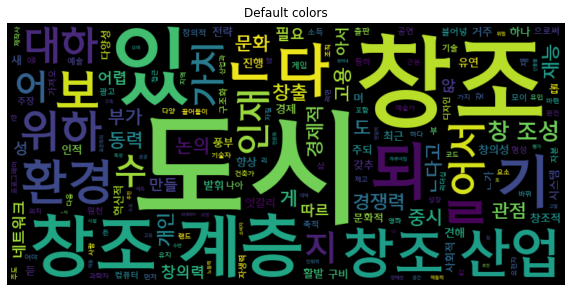

In [30]:
wc = WordCloud(font_path = 'C:/Windows/Fonts/이화체.ttf',max_words=1000, mask=mask, stopwords=stopwords, margin=10,
               random_state=1,contour_color='white').generate(str_txt)

wc.to_file("Kkma-morph.png")
plt.axis("off")
plt.figure(figsize=(10,10))
plt.title("Default colors")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [31]:
f = open('C:/example/kobartHannanummorph.txt','r',encoding = 'cp949')
txt = f.readlines()
f.close()

In [32]:
new_txt=[]
for i in txt:
    new_txt.append(i.replace('\n',''))

In [33]:
str_txt=''
for i in new_txt:
    str_txt = str_txt + i + ' '

In [34]:
from collections import Counter
Counter(new_txt).most_common()

[('이', 27),
 ('창조', 26),
 (',', 26),
 ('하', 21),
 ('을', 20),
 ('의', 19),
 ('.', 16),
 ('도시', 15),
 ('ㄴ', 15),
 ('는', 15),
 ('고', 10),
 ('다', 10),
 ('가', 9),
 ('ㄹ', 9),
 ('어', 8),
 ('있', 8),
 ('계층', 8),
 ('ㄴ다', 8),
 ('산업', 7),
 ('에', 6),
 ('되', 6),
 ('으로', 6),
 ('를', 6),
 ('지', 6),
 ('은', 5),
 ('보', 5),
 ('과', 5),
 ('위하', 4),
 ('돌', 4),
 ('시는', 4),
 ('환경', 4),
 ('것', 4),
 ('어서', 4),
 ('아', 4),
 ('로', 3),
 ('대하', 3),
 ('수', 3),
 ('창조성', 3),
 ('와', 3),
 ('등', 3),
 ('기', 3),
 ('들', 2),
 ('경쟁력', 2),
 ('논의', 2),
 ('게', 2),
 ('인재들', 2),
 ('문화', 2),
 ('도', 2),
 ('하고', 2),
 ('동력', 2),
 ('중시', 2),
 ('관점', 2),
 ('에서는', 2),
 ('경제적', 2),
 ('부가가치', 2),
 ('고용', 2),
 ('창출', 2),
 ('재능', 2),
 ('예술', 2),
 ('개인', 2),
 ('창의력', 2),
 ('네트워크', 2),
 ('따라서', 2),
 ('무엇', 2),
 ('필요', 2),
 ('그것', 2),
 ('만들', 2),
 ('않', 2),
 ('어렵', 2),
 ('최근', 1),
 ('향상', 1),
 ('새롭', 1),
 ('전략', 1),
 ('하나', 1),
 ('활발', 1),
 ('진행', 1),
 ('창조적', 1),
 ('창의성', 1),
 ('발휘', 1),
 ('갖추', 1),
 ('즉', 1),
 ('및', 1),
 ('거주', 1),
 ('풍부', 1),
 (

In [35]:
stop = [',','을','의','.','이','적','','는','에','으로','들','를','과','위','가','있는','것','하는','이다','와','등','은','할','하고',
       '인','인가','에서는','따라서','무엇','로','해서는','그것','되고','즉','및','고도','대해','서는','다소','음로써','한다고',
       '다','예','로는','여서','이를','통해','에는','과의','에서','또한','그','된','하여','인지','하','ㄴ','고','ㄴ다','ㄹ']
stopwords = set(stop)

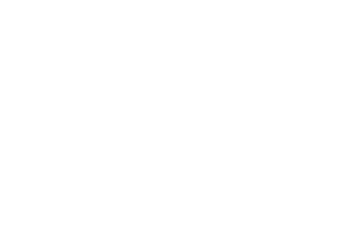

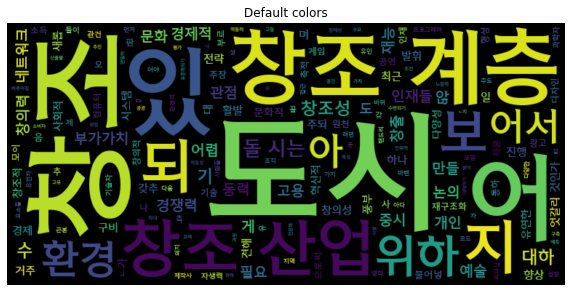

In [36]:
wc = WordCloud(font_path = 'C:/Windows/Fonts/이화체.ttf',max_words=1000, mask=mask, stopwords=stopwords, margin=10,
               random_state=1,contour_color='white').generate(str_txt)

wc.to_file("Hannanum-morph.png")
plt.axis("off")
plt.figure(figsize=(10,10))
plt.title("Default colors")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [37]:
f = open('C:/example/kobartkomoranexample.txt','r',encoding = 'cp949')
txt = f.readlines()
f.close()

In [38]:
new_txt=[]
for i in txt:
    new_txt.append(i.replace('\n',''))

In [39]:
str_txt=''
for i in new_txt:
    str_txt = str_txt + i + ' '

In [40]:
from collections import Counter
Counter(new_txt).most_common()

[(',', 26),
 ('하', 25),
 ('이', 24),
 ('는', 23),
 ('의', 20),
 ('을', 20),
 ('창조', 20),
 ('도시', 19),
 ('.', 16),
 ('ㄴ', 15),
 ('다', 10),
 ('적', 10),
 ('되', 8),
 ('고', 8),
 ('있', 8),
 ('계층', 8),
 ('에', 7),
 ('ㄹ', 7),
 ('창조 산업', 7),
 ('들', 6),
 ('으로', 6),
 ('를', 6),
 ('ㄴ다', 6),
 ('과', 6),
 ('기', 6),
 ('가', 5),
 ('환경', 5),
 ('보', 5),
 ('위하', 4),
 ('대하', 4),
 ('것', 4),
 ('은', 4),
 ('인재', 3),
 ('수', 3),
 ('문화', 3),
 ('창조성', 3),
 ('경제', 3),
 ('아서', 3),
 ('에서', 3),
 ('아', 3),
 ('와', 3),
 ('로', 3),
 ('등', 3),
 ('지', 3),
 ('어', 2),
 ('경쟁력', 2),
 ('논의', 2),
 ('게', 2),
 ('도', 2),
 ('동력', 2),
 ('중시', 2),
 ('관점', 2),
 ('화', 2),
 ('부가가치', 2),
 ('고용', 2),
 ('창출', 2),
 ('ㄴ다고', 2),
 ('재능', 2),
 ('개인', 2),
 ('창의력', 2),
 ('네트워크', 2),
 ('따라서', 2),
 ('무엇', 2),
 ('필요', 2),
 ('역동', 2),
 ('그것', 2),
 ('만들', 2),
 ('않', 2),
 ('어렵', 2),
 ('최근', 1),
 ('향상', 1),
 ('새롭', 1),
 ('전략', 1),
 ('하나로', 1),
 ('활발', 1),
 ('진행', 1),
 ('창의성', 1),
 ('발휘', 1),
 ('갖추', 1),
 ('즉', 1),
 ('및', 1),
 ('거주', 1),
 ('풍부', 1),
 ('며', 1),
 ('

In [41]:
stop = [',','을','의','.','이','적','','는','에','으로','들','를','과','위','가','있는','것','하는','이다','와','등','은','할','하고',
       '인','인가','에서는','따라서','무엇','로','해서는','그것','되고','즉','및','고도','대해','서는','다소','음로써','한다고',
       '다','예','로는','여서','이를','통해','에는','과의','에서','또한','그','된','하여','인지','하','ㄴ','고','ㄴ다','ㄹ']
stopwords = set(stop)

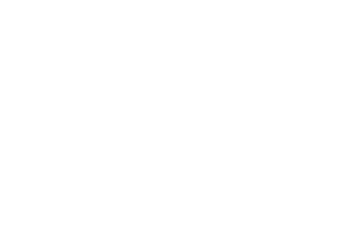

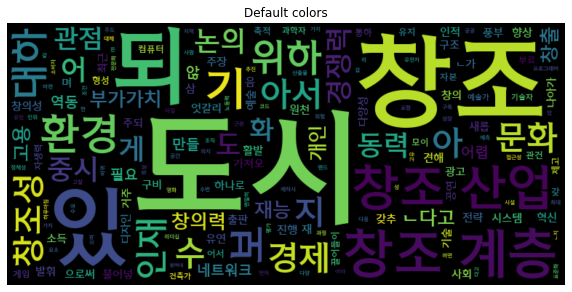

In [42]:
wc = WordCloud(font_path = 'C:/Windows/Fonts/이화체.ttf',max_words=1000, mask=mask, stopwords=stopwords, margin=10,
               random_state=1,contour_color='white').generate(str_txt)

wc.to_file("Komoran-morph.png")
plt.axis("off")
plt.figure(figsize=(10,10))
plt.title("Default colors")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [43]:
f = open('C:/example/kobartOktexample.txt','r',encoding = 'cp949')
txt = f.readlines()
f.close()

In [44]:
new_txt=[]
for i in txt:
    new_txt.append(i.replace('\n',''))

In [45]:
str_txt=''
for i in new_txt:
    str_txt = str_txt + i + ' '

In [46]:
from collections import Counter
Counter(new_txt).most_common()

[('창조', 27),
 (',', 26),
 ('을', 20),
 ('도시', 19),
 ('의', 19),
 ('.', 16),
 ('이', 16),
 ('적', 10),
 ('', 10),
 ('계층', 8),
 ('는', 7),
 ('산업', 7),
 ('에', 6),
 ('으로', 6),
 ('들', 5),
 ('환경', 5),
 ('를', 5),
 ('과', 5),
 ('위', 4),
 ('한', 4),
 ('가', 4),
 ('있다', 4),
 ('있는', 4),
 ('것', 4),
 ('하는', 4),
 ('대한', 3),
 ('인재', 3),
 ('수', 3),
 ('이다', 3),
 ('문화', 3),
 ('창조성', 3),
 ('경제', 3),
 ('와', 3),
 ('등', 3),
 ('은', 3),
 ('경쟁력', 2),
 ('논의', 2),
 ('할', 2),
 ('하고', 2),
 ('인', 2),
 ('동력', 2),
 ('볼', 2),
 ('인가', 2),
 ('중시', 2),
 ('관점', 2),
 ('에서는', 2),
 ('부가가치', 2),
 ('고용', 2),
 ('창', 2),
 ('재능', 2),
 ('개인', 2),
 ('창의력', 2),
 ('네트워크', 2),
 ('력', 2),
 ('따라서', 2),
 ('된다', 2),
 ('무엇', 2),
 ('로', 2),
 ('한다', 2),
 ('해서는', 2),
 ('역', 2),
 ('그것', 2),
 ('최근', 1),
 ('들어', 1),
 ('향상', 1),
 ('새로운', 1),
 ('전략', 1),
 ('하나로', 1),
 ('활발하게', 1),
 ('진행', 1),
 ('되고', 1),
 ('창의성', 1),
 ('발휘', 1),
 ('갖춘', 1),
 ('즉', 1),
 ('및', 1),
 ('거주', 1),
 ('풍부하며', 1),
 ('혁신', 1),
 ('고도', 1),
 ('유연한', 1),
 ('시스템', 1),
 ('구비', 1),
 ('주된'

In [47]:
stop = [',','을','의','.','이','적','','는','에','으로','들','를','과','위','가','있는','것','하는','이다','와','등','은','할','하고',
       '인','인가','에서는','따라서','무엇','로','해서는','그것','되고','즉','및','고도','대해','서는','다소','음로써','한다고',
       '다','예','로는','여서','이를','통해','에는','과의','에서','또한','그','된','하여','인지','하','ㄴ','고','ㄴ다','ㄹ']
stopwords = set(stop)

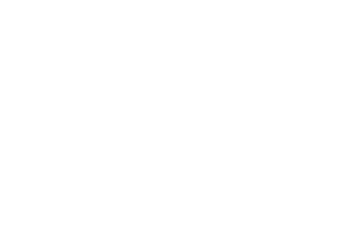

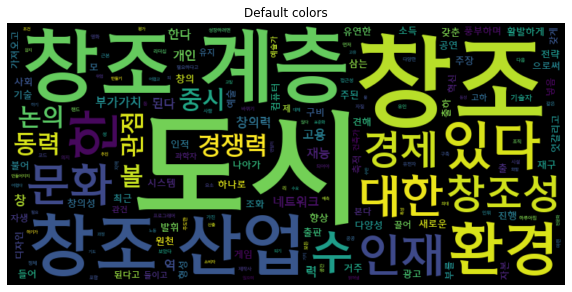

In [48]:
wc = WordCloud(font_path = 'C:/Windows/Fonts/이화체.ttf',max_words=1000, mask=mask, stopwords=stopwords, margin=10,
               random_state=1,contour_color='white').generate(str_txt)

wc.to_file("Okt-morph.png")
plt.axis("off")
plt.figure(figsize=(10,10))
plt.title("Default colors")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()